In [76]:
#Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [77]:
#Import Cleaned Code
szn_78 = pd.read_csv('teams_07_08.csv')
szn_89 = pd.read_csv('teams_08_09.csv')
szn_910 = pd.read_csv('teams_09_10.csv')
szn_1011 = pd.read_csv('teams_10_11.csv')
szn_1112 = pd.read_csv('teams_11_12.csv')
szn_1314 = pd.read_csv('teams_13_14.csv')
szn_1415 = pd.read_csv('teams_14_15.csv')
szn_1516 = pd.read_csv('teams_15_16.csv')
szn_1617 = pd.read_csv('teams_16_17.csv')
szn_1718 = pd.read_csv('teams_17_18.csv')

#Aggregating past season data / Creating Binary Dependent Variable
szn_lists = [szn_78, szn_89, szn_910, szn_1011, szn_1112, szn_1314, szn_1415, szn_1516, szn_1617, szn_1718]
past_szns = pd.concat(szn_lists, axis=0, ignore_index=True)
past_szns['binary_playoffs'] = past_szns['made_playoffs'].apply(lambda x: 1 if x == 'Yes' else 0)
past_szns.head()

,Unnamed: 0,team_name,away_wins,home_wins,away_losses,home_losses,total_goals_scored,total_goals_against,made_playoffs,binary_playoffs
0,0,New Jersey Devils,21.0,25.0,20.0,16.0,206.0,197.0,Yes,1
1,1,Philadelphia Flyers,21.0,21.0,20.0,20.0,248.0,233.0,Yes,1
2,2,Los Angeles Kings,15.0,17.0,26.0,24.0,231.0,266.0,No,0
3,3,Tampa Bay Lightning,11.0,20.0,30.0,21.0,223.0,267.0,No,0
4,4,Boston Bruins,20.0,21.0,21.0,20.0,212.0,222.0,Yes,1


In [78]:
model = sm.logit(formula = 'binary_playoffs~away_wins+home_wins+total_goals_against+total_goals_scored', data = past_szns).fit() #Developing logistic regression model
model.summary()

Optimization terminated successfully.
         Current function value: 0.147874
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        binary_playoffs   No. Observations:                  330
Model:                          Logit   Df Residuals:                      325
Method:                           MLE   Df Model:                            4
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.7865
Time:                        11:32:38   Log-Likelihood:                -48.798
converged:                       True   LL-Null:                       -228.59
Covariance Type:            nonrobust   LLR p-value:                 1.499e-76
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -18.4671      6.738     -2.741      0.006     -31.673      -5.261
away_wins               0.7085      0.177      3.996      0.000       0.361       1.056
home_wins               0.6762      0.159      4.250      0.000       0.364       0.988
total_goals_against    -0.0882      0.028     -3.129      0.002      -0.143      -0.033
total_goals_scored      0.0450      0.026      1.745      0.081      -0.006       0.096
=======================================================================================

Possibly complete quasi-separation: A fraction 0.28 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Important insight on the initial model, adding away_losses and home_losses to the model would cause the model algorithm to not converge -> leading primarily to a P>|z| value roughly equal to 1 in every prediction variable (the model breaks). This is suggests our model has complete separation or complete quasi-separation meaning that a predictor variable perfeclty separates (predicts) our outcome variable. This is useful to our analysis; however, it causes the Maximum Likelihood Estimate to incorrectly calculate coefficients for our model.**

**As discovered later, our model is already very accurate and, since we are not familiar with how to approach this type of problem, the separating variables were excluded from the model.**

Text(0.5, 0, 'Total Goals Scored')

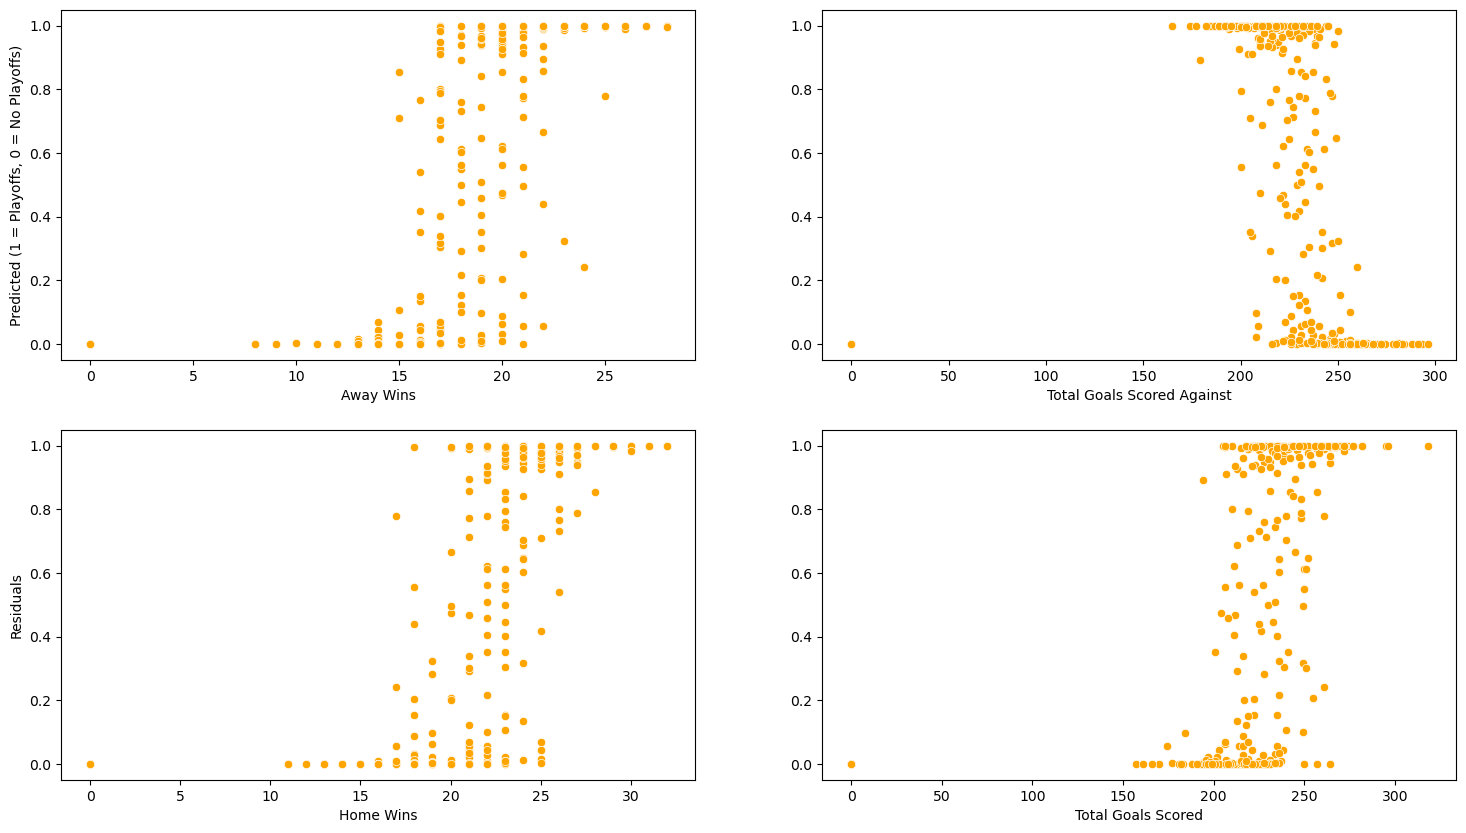

In [79]:
# Graph the Relationship between Predictor Variables and Model Prediction on Training Data
fig, axes = plt.subplots(2,2, figsize=(18, 10))

sns.scatterplot(ax=axes[0][0], x = past_szns.away_wins, y=model.predict(past_szns),color = 'orange')
axes[0][0].set_ylabel('Predicted (1 = Playoffs, 0 = No Playoffs)')
axes[0][0].set_xlabel('Away Wins')

sns.scatterplot(ax=axes[1][0], x = past_szns.home_wins, y=model.predict(past_szns),color = 'orange')
axes[1][0].set_xlabel('Home Wins')
axes[1][0].set_ylabel('Residuals')

sns.scatterplot(ax=axes[0][1], x = past_szns.total_goals_against, y=model.predict(past_szns),color = 'orange')
axes[0][1].set_xlabel('Total Goals Scored Against')

sns.scatterplot(ax=axes[1][1], x = past_szns.total_goals_scored, y=model.predict(past_szns),color = 'orange')
axes[1][1].set_xlabel('Total Goals Scored')

In [80]:
# Remove the Outliers to better the fit of the Model (pretty sure no team has not won a game or never scored a goal during the season)
past_szns = past_szns.loc[past_szns['home_wins'] != 0]
past_szns = past_szns.loc[past_szns['away_wins'] != 0]
past_szns = past_szns.loc[past_szns['total_goals_against'] != 0]
past_szns = past_szns.loc[past_szns['total_goals_scored'] != 0]

# Recalculate Model and Graphs without Outliers
model = sm.logit(formula = 'binary_playoffs~away_wins+home_wins+total_goals_against+total_goals_scored', data = past_szns).fit() #Developing logistic regression model
model.summary()

Optimization terminated successfully.
         Current function value: 0.162121
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        binary_playoffs   No. Observations:                  301
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            4
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.7654
Time:                        11:32:40   Log-Likelihood:                -48.798
converged:                       True   LL-Null:                       -208.04
Covariance Type:            nonrobust   LLR p-value:                 1.117e-67
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -18.4671      6.738     -2.741      0.006     -31.673      -5.261
away_wins               0.7085      0.177      3.996      0.000       0.361       1.056
home_wins               0.6762      0.159      4.250      0.000       0.364       0.988
total_goals_against    -0.0882      0.028     -3.129      0.002      -0.143      -0.033
total_goals_scored      0.0450      0.026      1.745      0.081      -0.006       0.096
=======================================================================================

Possibly complete quasi-separation: A fraction 0.22 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

[Text(0.5, 0, '')]

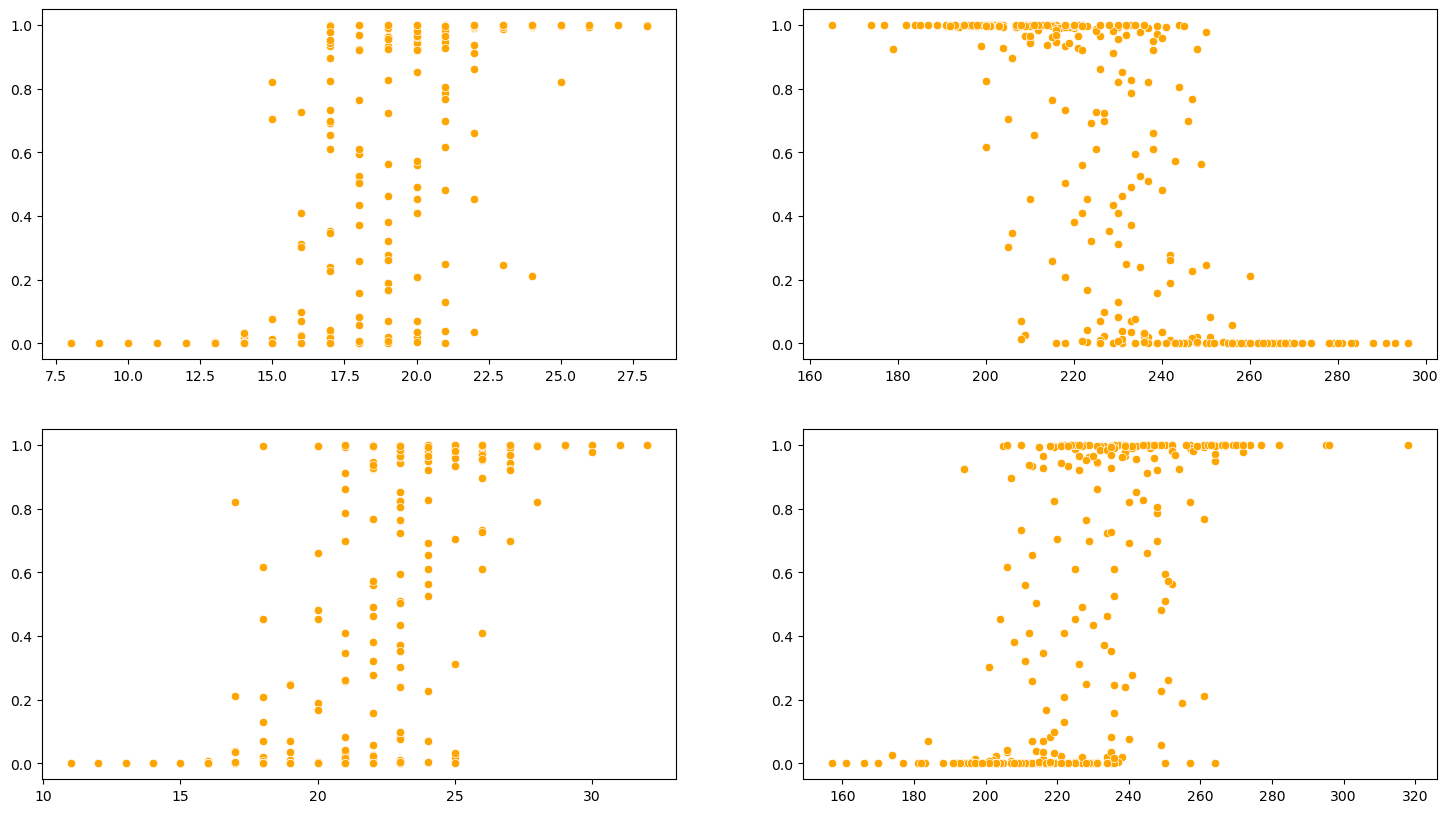

In [321]:
# Graph the Relationship between Predictor Variables and Model Prediction on Training Data (No Outliers)
fig, axes = plt.subplots(2,2, figsize=(18, 10))

sns.scatterplot(ax=axes[0][0], x = past_szns.away_wins, y=model.predict(past_szns),color = 'orange')
axes[0][0].set(xlabel=None)

sns.scatterplot(ax=axes[1][0], x = past_szns.home_wins, y=model.predict(past_szns),color = 'orange')
axes[1][0].set(xlabel=None)

sns.scatterplot(ax=axes[0][1], x = past_szns.total_goals_against, y=model.predict(past_szns),color = 'orange')
axes[0][1].set(xlabel=None)

sns.scatterplot(ax=axes[1][1], x = past_szns.total_goals_scored, y=model.predict(past_szns),color = 'orange')
axes[1][1].set(xlabel=None)

______________

**Ultimately, removing the outliers did not affect the model at all; nonetheless, the relationship between predictor/prediction is more detailed within the graphs.**

Text(0.5, 0, 'Total Goals Scored (Squared)')

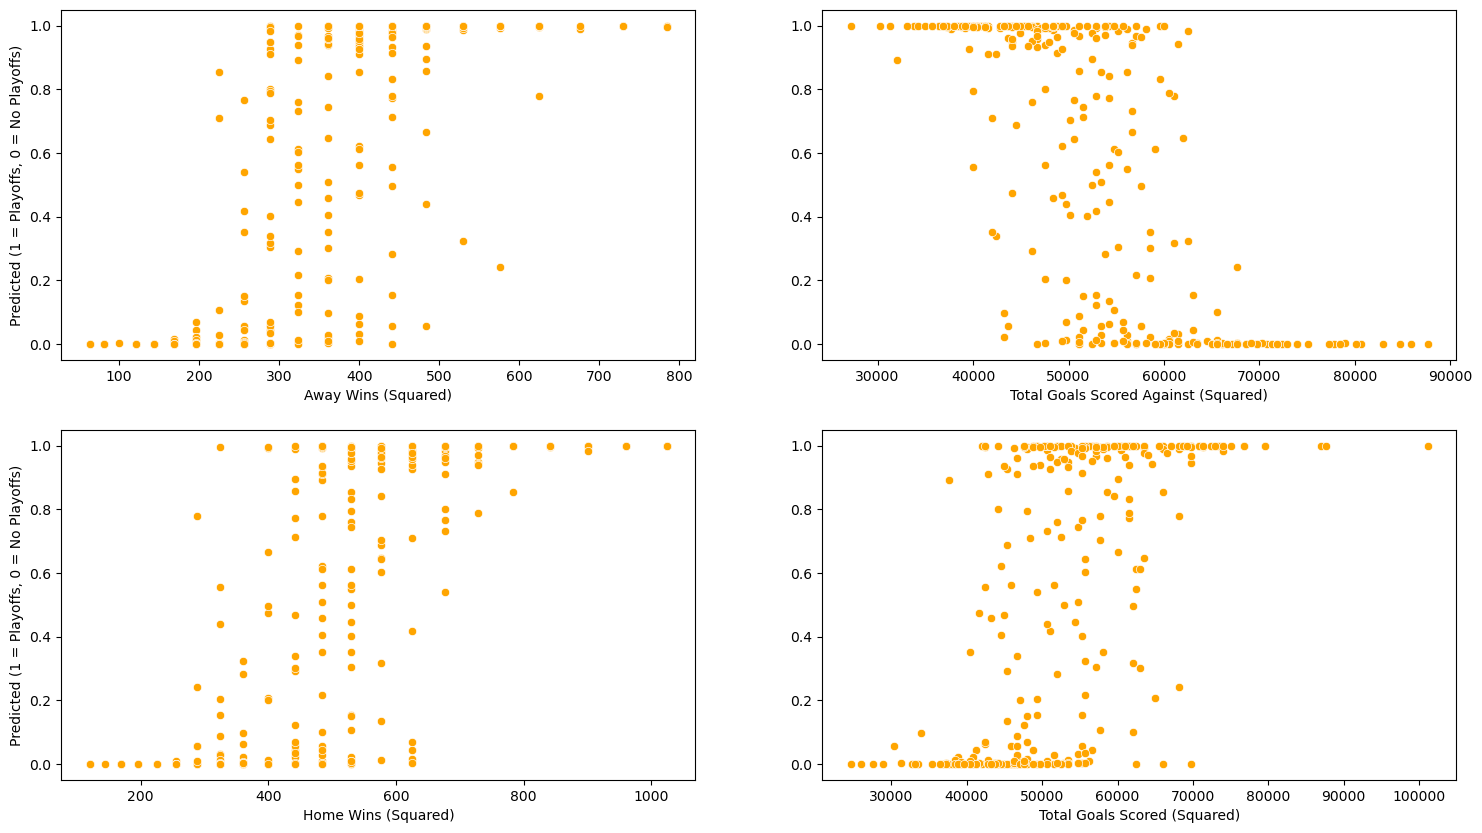

In [82]:
# Check Quadratic Transformations Since the Variables Seem to Have Curvature (no outliers)
past_szns['away_wins**2'] = past_szns['away_wins'].apply(lambda x: x*x)
past_szns['home_wins**2'] = past_szns['home_wins'].apply(lambda x: x*x)
past_szns['total_goals_against**2'] = past_szns['total_goals_against'].apply(lambda x: x*x)
past_szns['total_goals_scored**2'] = past_szns['total_goals_scored'].apply(lambda x: x*x)

fig, axes = plt.subplots(2,2, figsize=(18, 10))

sns.scatterplot(ax=axes[0][0], x = past_szns['away_wins**2'], y=model.predict(past_szns),color = 'orange')
axes[0][0].set_ylabel('Predicted (1 = Playoffs, 0 = No Playoffs)')
axes[0][0].set_xlabel('Away Wins (Squared)')

sns.scatterplot(ax=axes[1][0], x = past_szns['home_wins**2'], y=model.predict(past_szns),color = 'orange')
axes[1][0].set_xlabel('Home Wins (Squared)')
axes[1][0].set_ylabel('Predicted (1 = Playoffs, 0 = No Playoffs)')

sns.scatterplot(ax=axes[0][1], x = past_szns['total_goals_against**2'], y=model.predict(past_szns),color = 'orange')
axes[0][1].set_xlabel('Total Goals Scored Against (Squared)')

sns.scatterplot(ax=axes[1][1], x = past_szns['total_goals_scored**2'], y=model.predict(past_szns),color = 'orange')
axes[1][1].set_xlabel('Total Goals Scored (Squared)')

Text(0.5, 0, 'Total Goals Scored (Cubed)')

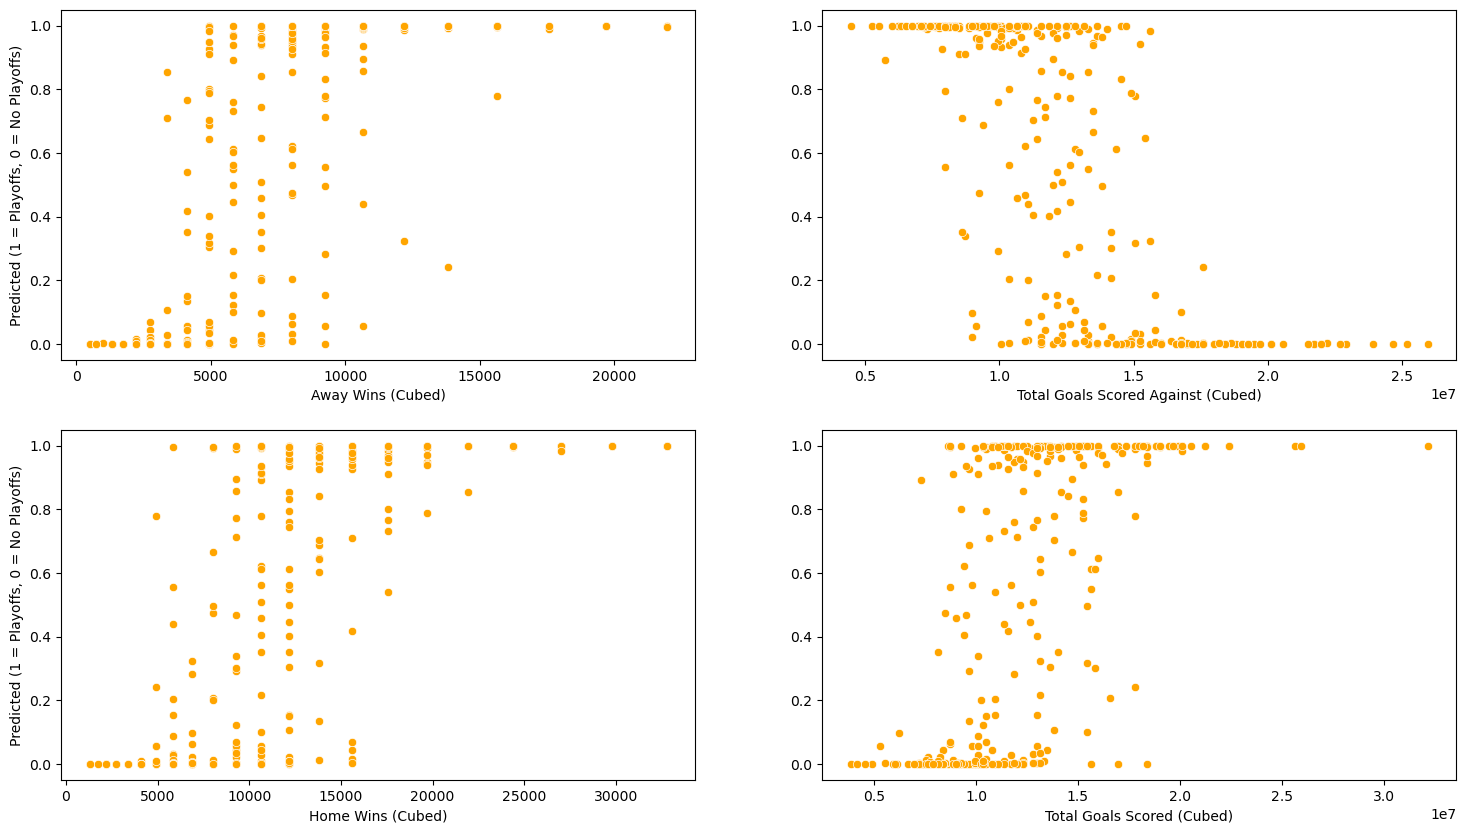

In [83]:
# Check Cubic Transformations Since the Variables Seem to Have Curvature (no outliers)
past_szns['away_wins**3'] = past_szns['away_wins'].apply(lambda x: x*x*x)
past_szns['home_wins**3'] = past_szns['home_wins'].apply(lambda x: x*x*x)
past_szns['total_goals_against**3'] = past_szns['total_goals_against'].apply(lambda x: x*x*x)
past_szns['total_goals_scored**3'] = past_szns['total_goals_scored'].apply(lambda x: x*x*x)

fig, axes = plt.subplots(2,2, figsize=(18, 10))

sns.scatterplot(ax=axes[0][0], x = past_szns['away_wins**3'], y=model.predict(past_szns),color = 'orange')
axes[0][0].set_ylabel('Predicted (1 = Playoffs, 0 = No Playoffs)')
axes[0][0].set_xlabel('Away Wins (Cubed)')

sns.scatterplot(ax=axes[1][0], x = past_szns['home_wins**3'], y=model.predict(past_szns),color = 'orange')
axes[1][0].set_xlabel('Home Wins (Cubed)')
axes[1][0].set_ylabel('Predicted (1 = Playoffs, 0 = No Playoffs)')

sns.scatterplot(ax=axes[0][1], x = past_szns['total_goals_against**3'], y=model.predict(past_szns),color = 'orange')
axes[0][1].set_xlabel('Total Goals Scored Against (Cubed)')

sns.scatterplot(ax=axes[1][1], x = past_szns['total_goals_scored**3'], y=model.predict(past_szns),color = 'orange')
axes[1][1].set_xlabel('Total Goals Scored (Cubed)')

In [84]:
# Try the Cubic Transformations?
model2 = sm.logit(formula = 'binary_playoffs~away_wins+I(away_wins**2)+I(away_wins**3)+home_wins+I(home_wins**2)+I(home_wins**3)+total_goals_against+I(total_goals_against**2)+I(total_goals_against**3)+total_goals_scored+I(total_goals_scored**2) + I(total_goals_scored**3)', data = past_szns).fit() #Developing logistic regression model
model2.summary()

Optimization terminated successfully.
         Current function value: 0.148246
         Iterations 18


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        binary_playoffs   No. Observations:                  301
Model:                          Logit   Df Residuals:                      288
Method:                           MLE   Df Model:                           12
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.7855
Time:                        11:32:44   Log-Likelihood:                -44.622
converged:                       True   LL-Null:                       -208.04
Covariance Type:            nonrobust   LLR p-value:                 1.072e-62
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     552.0655   1443.986      0.382      0.702   -2278.094    3382.225
away_wins                       6.1258     13.291      0.461      0.645     -19.924      32.175
I(away_wins ** 2)              -0.2341      0.659     -0.355      0.722      -1.525       1.057
I(away_wins ** 3)               0.0032      0.011      0.299      0.765      -0.018       0.024
home_wins                      26.9804     24.513      1.101      0.271     -21.064      75.025
I(home_wins ** 2)              -1.1842      1.111     -1.066      0.286      -3.362       0.993
I(home_wins ** 3)               0.0176      0.017      1.057      0.290      -0.015       0.050
total_goals_against           -18.4250     17.669     -1.043      0.297     -53.055      16.205
I(total_goals_against ** 2)     0.0839      0.079      1.061      0.289      -0.071       0.239
I(total_goals_against ** 3)    -0.0001      0.000     -1.083      0.279      -0.000       0.000
total_goals_scored              7.1949     10.187      0.706      0.480     -12.771      27.161
I(total_goals_scored ** 2)     -0.0321      0.045     -0.718      0.473      -0.120       0.056
I(total_goals_scored ** 3)   4.792e-05   6.53e-05      0.733      0.463   -8.02e-05       0.000
===============================================================================================

Possibly complete quasi-separation: A fraction 0.39 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [85]:
# Try Model Interactions
model3 = sm.logit(formula = 'binary_playoffs~away_wins*total_goals_against + home_wins*total_goals_against+away_wins*total_goals_scored+home_wins*total_goals_scored', data = past_szns).fit() #Developing logistic regression model
model3.summary()

Optimization terminated successfully.
         Current function value: 0.159152
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        binary_playoffs   No. Observations:                  301
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                            8
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.7697
Time:                        11:32:44   Log-Likelihood:                -47.905
converged:                       True   LL-Null:                       -208.04
Covariance Type:            nonrobust   LLR p-value:                 1.990e-64
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       -25.2411     89.280     -0.283      0.777    -200.226     149.744
away_wins                         1.8133      2.584      0.702      0.483      -3.251       6.878
total_goals_against               0.1201      0.416      0.289      0.773      -0.695       0.935
away_wins:total_goals_against    -0.0125      0.011     -1.097      0.272      -0.035       0.010
home_wins                         0.0774      2.311      0.034      0.973      -4.453       4.607
home_wins:total_goals_against     0.0007      0.012      0.058      0.954      -0.023       0.025
total_goals_scored               -0.1345      0.346     -0.389      0.697      -0.812       0.543
away_wins:total_goals_scored      0.0077      0.010      0.743      0.458      -0.013       0.028
home_wins:total_goals_scored      0.0019      0.010      0.190      0.849      -0.018       0.021
=================================================================================================

Possibly complete quasi-separation: A fraction 0.20 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [96]:
# Interactions and Transformations
model4 = sm.logit(formula = 'binary_playoffs~(away_wins+I(away_wins**2)+I(away_wins**3))*total_goals_against + (home_wins+I(home_wins**2)+I(home_wins**3))*total_goals_against+(away_wins+I(away_wins**2)+I(away_wins**3))*total_goals_scored+(home_wins+I(home_wins**2)+I(home_wins**3))*total_goals_scored', data = past_szns).fit() #Developing logistic regression model
model4.summary()

Optimization terminated successfully.
         Current function value: 0.136081
         Iterations 34


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        binary_playoffs   No. Observations:                  301
Model:                          Logit   Df Residuals:                      280
Method:                           MLE   Df Model:                           20
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.8031
Time:                        11:36:58   Log-Likelihood:                -40.960
converged:                       True   LL-Null:                       -208.04
Covariance Type:            nonrobust   LLR p-value:                 8.124e-59
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                             -4577.2372   3027.872     -1.512      0.131   -1.05e+04    1357.282
away_wins                               587.8580    385.475      1.525      0.127    -167.659    1343.375
I(away_wins ** 2)                       -29.7631     19.842     -1.500      0.134     -68.652       9.126
I(away_wins ** 3)                         0.4984      0.338      1.473      0.141      -0.165       1.161
total_goals_against                       4.3493      9.658      0.450      0.652     -14.580      23.278
away_wins:total_goals_against             0.6329      1.168      0.542      0.588      -1.656       2.921
I(away_wins ** 2):total_goals_against    -0.0347      0.058     -0.599      0.549      -0.148       0.079
I(away_wins ** 3):total_goals_against     0.0006      0.001      0.634      0.526      -0.001       0.002
home_wins                               139.3807    314.997      0.442      0.658    -478.002     756.763
I(home_wins ** 2)                        -7.9801     14.284     -0.559      0.576     -35.976      20.016
I(home_wins ** 3)                         0.1446      0.215      0.671      0.502      -0.278       0.567
home_wins:total_goals_against            -1.1749      0.975     -1.205      0.228      -3.086       0.736
I(home_wins ** 2):total_goals_against     0.0562      0.047      1.193      0.233      -0.036       0.149
I(home_wins ** 3):total_goals_against    -0.0009      0.001     -1.172      0.241      -0.002       0.001
total_goals_scored                       12.7778     10.017      1.276      0.202      -6.855      32.410
away_wins:total_goals_scored             -3.0739      1.746     -1.761      0.078      -6.496       0.348
I(away_wins ** 2):total_goals_scored      0.1583      0.088      1.793      0.073      -0.015       0.331
I(away_wins ** 3):total_goals_scored     -0.0027      0.001     -1.807      0.071      -0.006       0.000
home_wins:total_goals_scored              0.8355      0.781      1.069      0.285      -0.696       2.367
I(home_wins ** 2):total_goals_scored     -0.0334      0.034     -0.969      0.332      -0.101       0.034
I(home_wins ** 3):total_goals_scored      0.0004      0.001      0.850      0.395      -0.001       0.001
=========================================================================================================

Possibly complete quasi-separation: A fraction 0.46 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

________________________

In [87]:
# Building Out Confusion Matrices
def confusion_matrix_train(model,cutoff=0.75):
    # Confusion matrix
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    #Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1'] 
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    
def confusion_matrix_test(data,actual_values,model,cutoff=0.75):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))

Classification accuracy = 90.7%


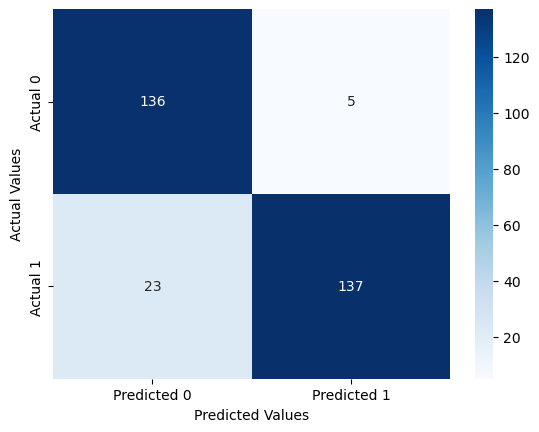

In [88]:
confusion_matrix_train(model)

Classification accuracy = 91.7%


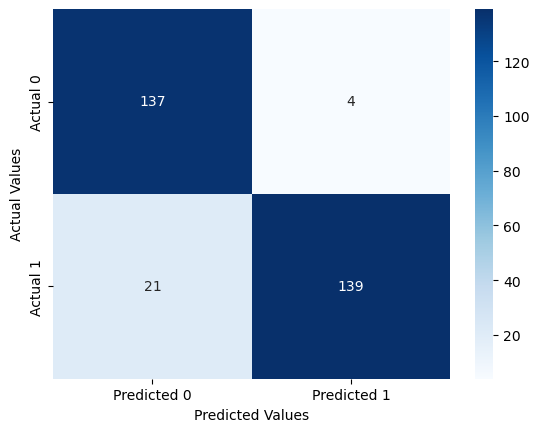

In [89]:
confusion_matrix_train(model2)

Classification accuracy = 91.0%


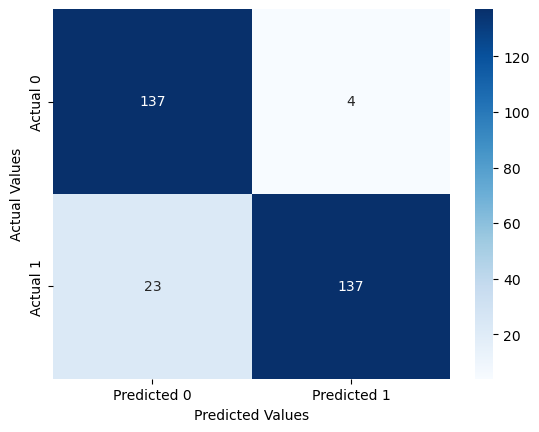

In [90]:
confusion_matrix_train(model3)

Classification accuracy = 93.4%


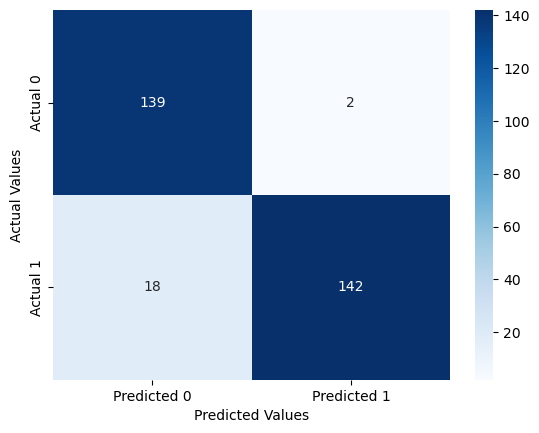

In [91]:
confusion_matrix_train(model4)

In [92]:
#Recall
147 / (147 + 13)

0.91875

In [93]:
#Precision
147 / (147 + 14)

0.9130434782608695

**With our current model and a threshold of 0.5, our model accurately predicts whether a team made the playoffs in training data 91% of the time with a Precision and Recall value also roughly equal to 91%.**

____________

In [11]:
# Make Test Data Utilizing Random Sample / Retrain Model and Evaluate Test Data Accuracy

In [294]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(past_szns)

# Standard Model with Relevant Predictors
model = sm.logit(formula = 'binary_playoffs~away_wins+home_wins+total_goals_against+total_goals_scored', data = train).fit()

# Cubic Transformation of Predictors
model2 = sm.logit(formula = 'binary_playoffs~away_wins+I(away_wins**2)+I(away_wins**3)+home_wins+I(home_wins**2)+I(home_wins**3)+total_goals_against+I(total_goals_against**2)+I(total_goals_against**3)+total_goals_scored+I(total_goals_scored**2)+I(total_goals_scored**3)', data = train).fit()

# Interactions between Wins / Goals
model3 = sm.logit(formula = 'binary_playoffs~away_wins*total_goals_against + home_wins*total_goals_against+away_wins*total_goals_scored+home_wins*total_goals_scored', data = train).fit()

# Interactions and Transformations
model4 = sm.logit(formula = 'binary_playoffs~(away_wins+I(away_wins**2)+I(away_wins**3))*total_goals_against + home_wins*total_goals_against+(away_wins+I(away_wins**2))*total_goals_scored + home_wins*total_goals_scored', data = train).fit() 

Optimization terminated successfully.
         Current function value: 0.154189
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.135509
         Iterations 24
Optimization terminated successfully.
         Current function value: 0.151254
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.139159
         Iterations 18


Classification accuracy = 91.1%


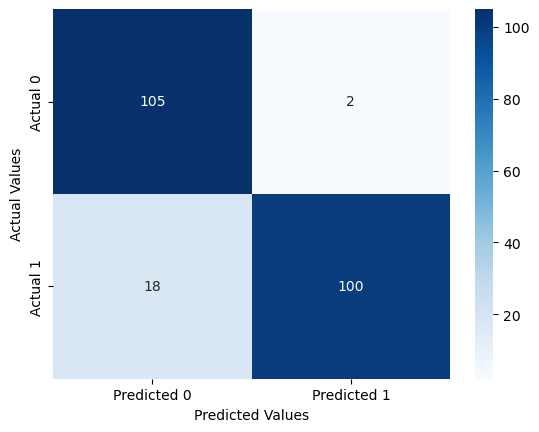

In [295]:
confusion_matrix_train(model)

Classification accuracy = 92.4%


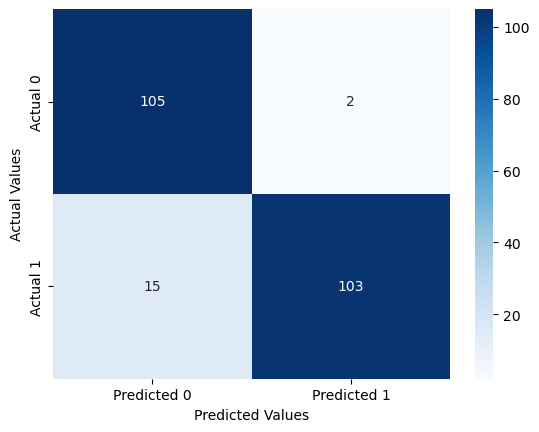

In [296]:
confusion_matrix_train(model2)

Classification accuracy = 91.1%


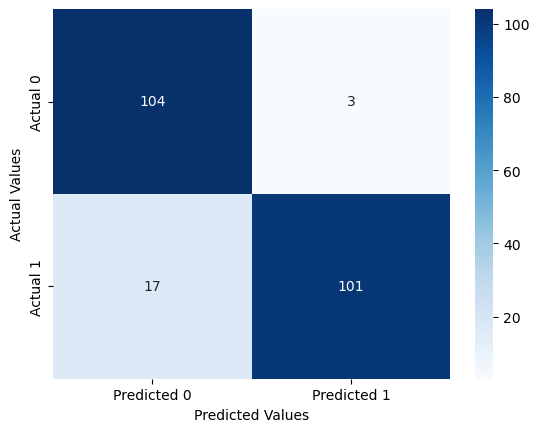

In [297]:
confusion_matrix_train(model3)

Classification accuracy = 92.4%


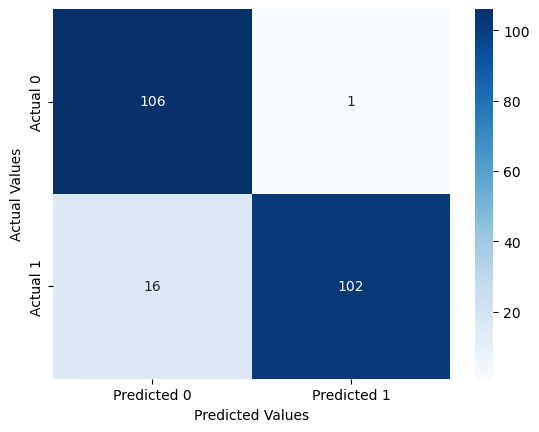

In [298]:
confusion_matrix_train(model4)

Classification accuracy = 90.8%


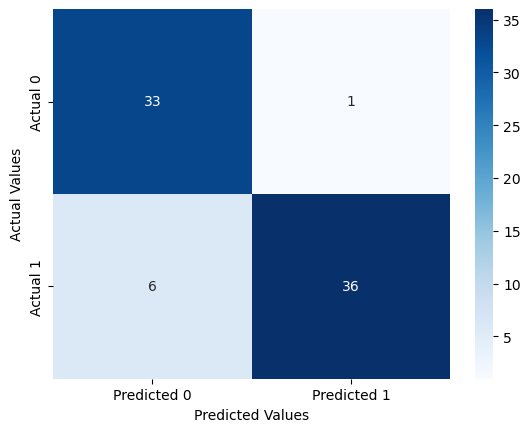

In [299]:
confusion_matrix_test(test, test.binary_playoffs, model)

Classification accuracy = 88.2%


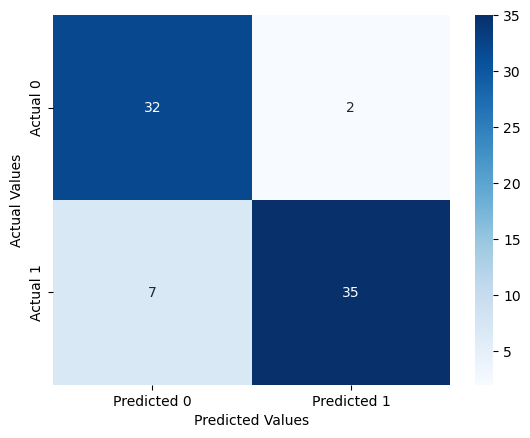

In [300]:
confusion_matrix_test(test, test.binary_playoffs, model2)

Classification accuracy = 90.8%


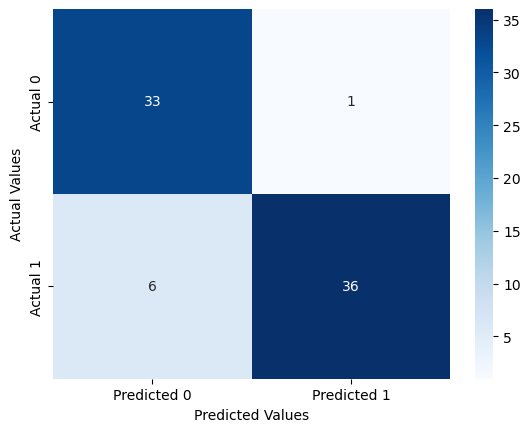

In [301]:
confusion_matrix_test(test, test.binary_playoffs, model3)

Classification accuracy = 88.2%


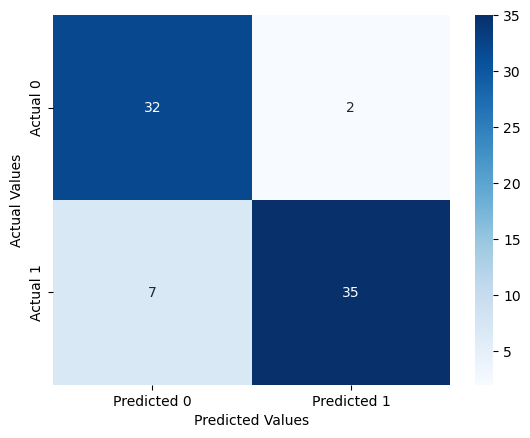

In [302]:
confusion_matrix_test(test, test.binary_playoffs, model4)

**With this data, we chose to use model3 (Interaction between Wins / Goals). Due to 94.7% accuracy on testing data, and 95.12% recall and precision.**

__________

In [63]:
# Philosophy for Data Frame
# Make a Dataframe of every possible outcome of the Predator's Season, see which outcomes yield a predicted Playoff Appearance

# Currently, Predators have 9 home wins, 10 away wins, 112 goals scored, 117 goals against
# There are 41 home/away games : Preds have played 18/22 : Max home/away wins is 28/26 : https://www.statmuse.com/nhl/ask/nashville-predators-home-and-away-stats-this-season
# Most goals scored by a team in a season is 446, Interestingly, record for most goals against is also 446 (different teams)
# With 31 games left, Predators would need 11 pts a game (very unlikely), instead let us compare to the current leader in 
# goals per game (3.83) and, for simplicity, argue the maximum average amount of goals scored/against by any team is capped at
# 4 goals per game. This implies that the Predators goals scored is maxed at 234, and goals against is maxed at 242.

In [248]:
# Making the DataFrame
rows = []

for home_win in range(9, 33):
    for away_win in range(10, 30):
        for goals_scored in range(112, 237):
            for goals_against in range(117, 242):
                rows.append([home_win, away_win, goals_scored, goals_against])

preds_df = pd.DataFrame(rows, columns = ['home_wins','away_wins','total_goals_scored','total_goals_against'])
preds_df

,home_wins,away_wins,total_goals_scored,total_goals_against
0,9,10,112,117
1,9,10,112,118
2,9,10,112,119
3,9,10,112,120
4,9,10,112,121
...,...,...,...,...
7499995,32,29,236,237
7499996,32,29,236,238
7499997,32,29,236,239
7499998,32,29,236,240


In [303]:
preds_df['predicted_playoff'] = model3.predict(preds_df)
preds_df

,home_wins,away_wins,total_goals_scored,total_goals_against,predicted_playoff,binary_playoff
0,9,10,112,117,6.007999e-09,0
1,9,10,112,118,5.248603e-09,0
2,9,10,112,119,4.585193e-09,0
3,9,10,112,120,4.005636e-09,0
4,9,10,112,121,3.499333e-09,0
...,...,...,...,...,...,...
7499995,32,29,236,237,9.999982e-01,1
7499996,32,29,236,238,9.999979e-01,1
7499997,32,29,236,239,9.999976e-01,1
7499998,32,29,236,240,9.999972e-01,1


In [304]:
# Set a High Threshold (75%) because we care more about the accuracy of our recommendation
preds_df['binary_playoff'] = preds_df['predicted_playoff'].apply(lambda x: 1 if x >= 0.75 else 0)
preds_df.loc[preds_df['binary_playoff']==1].shape[0] / preds_df.shape[0]

0.5149218666666666

**With a 75% threshold, the Predators will make the playoffs in roughly 46.8% of their potential end season stats.**

___________

In [305]:
# Hard to Visualize Impact, Need a Better Way to Look at Things
preds_df.groupby('home_wins')['predicted_playoff'].mean()

home_wins
9     0.289733
10    0.303074
11    0.317388
12    0.332772
13    0.349332
14    0.367182
15    0.386443
16    0.407239
17    0.429696
18    0.453933
19    0.480061
20    0.508166
21    0.538282
22    0.570352
23    0.604153
24    0.639239
25    0.675016
26    0.711025
27    0.747054
28    0.782981
29    0.818627
30    0.853554
31    0.886642
32    0.915603
Name: predicted_playoff, dtype: float64

In [306]:
preds_df.groupby('away_wins')['predicted_playoff'].mean()

away_wins
10    0.024978
11    0.060376
12    0.129795
13    0.219675
14    0.306853
15    0.384703
16    0.453569
17    0.514623
18    0.568847
19    0.616995
20    0.659658
21    0.697339
22    0.730527
23    0.759767
24    0.785612
25    0.808542
26    0.828958
27    0.847186
28    0.863498
29    0.878119
Name: predicted_playoff, dtype: float64

In [307]:
preds_df.groupby('total_goals_against')['predicted_playoff'].mean()

total_goals_against
117    0.796817
118    0.794355
119    0.791866
120    0.789349
121    0.786804
         ...   
237    0.282031
238    0.277943
239    0.273913
240    0.269939
241    0.266021
Name: predicted_playoff, Length: 125, dtype: float64

In [308]:
preds_df.groupby('total_goals_scored')['predicted_playoff'].mean()

total_goals_scored
112    0.406231
113    0.408204
114    0.410189
115    0.412184
116    0.414190
         ...   
232    0.722107
233    0.725327
234    0.728551
235    0.731778
236    0.735007
Name: predicted_playoff, Length: 125, dtype: float64

In [309]:
variable = preds_df.groupby('total_goals_against')['predicted_playoff'].mean()
variable.loc[variable >= 0.5]

total_goals_against
117    0.796817
118    0.794355
119    0.791866
120    0.789349
121    0.786804
         ...   
189    0.524408
190    0.519198
191    0.513967
192    0.508717
193    0.503448
Name: predicted_playoff, Length: 77, dtype: float64

In [310]:
variable = preds_df.groupby('total_goals_scored')['predicted_playoff'].mean()
variable.loc[variable >= 0.5]

total_goals_scored
155    0.501170
156    0.503626
157    0.506095
158    0.508574
159    0.511065
         ...   
232    0.722107
233    0.725327
234    0.728551
235    0.731778
236    0.735007
Name: predicted_playoff, Length: 82, dtype: float64

______________

In [311]:
# Recommendations based on current goals scored, against trajectory
avg_goals_pd = preds_df.loc[(preds_df['total_goals_scored'] == 199) & (preds_df['total_goals_against'] == 207)]
avg_goals_pd.groupby('home_wins')['predicted_playoff'].mean()

home_wins
9     0.065934
10    0.096336
11    0.130551
12    0.166946
13    0.204487
14    0.242603
15    0.281000
16    0.319534
17    0.358134
18    0.396766
19    0.435412
20    0.474065
21    0.512720
22    0.551374
23    0.590023
24    0.628661
25    0.667275
26    0.705837
27    0.744292
28    0.782528
29    0.820312
30    0.857188
31    0.892302
32    0.924224
Name: predicted_playoff, dtype: float64

In [312]:
avg_goals_pd.groupby('away_wins')['predicted_playoff'].mean()

away_wins
10    0.030275
11    0.059076
12    0.099319
13    0.146937
14    0.198208
15    0.251052
16    0.304531
17    0.358259
18    0.412084
19    0.465945
20    0.519815
21    0.573681
22    0.627519
23    0.681282
24    0.734851
25    0.787923
26    0.839753
27    0.888630
28    0.931259
29    0.963357
Name: predicted_playoff, dtype: float64

In [314]:
model3.predict(pd.DataFrame([[20, 18, 199, 207]], columns=['home_wins','away_wins','total_goals_scored', 'total_goals_against']))

0    0.128099
dtype: float64